In [ ]:
import csv
import sys
import math as m
import time
import networkx as nx
import matplotlib.pyplot as plt

Enter your dataset name with extentionhs.csv
Enter delimiter type(as symbol),
Enter your dataset Edge weight type float/int?int
Do you want to have the drawn graph view?(Y/N)
y


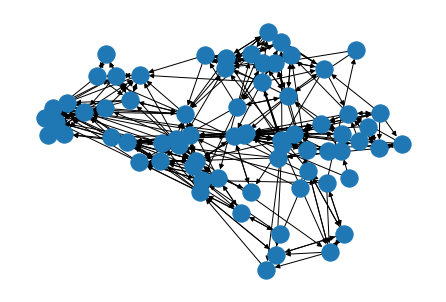

Elapsed time 0.7143 minutes


In [ ]:
tic = time.perf_counter()
degreelist=[]
closenesslist=[]
betweennesslist=[]
pagernklist=[]
file = input("Enter your dataset name with extention")
dlimit = input("Enter delimiter type(as symbol)")
wtype = input("Enter your dataset Edge weight type float/int?")
da = open(file,"r")     # we are opening the dataset as da
data = csv.reader(open(file,"r"),delimiter=dlimit)
Graphtype=nx.DiGraph()
if(wtype=="float"):
  G = nx.parse_edgelist(da, comments='t',delimiter=dlimit, create_using=Graphtype, nodetype=str, data=(('weight', float),))  # G is the graph object of networkx created based on the datas
else:
  G = nx.parse_edgelist(da, comments='t',delimiter=dlimit, create_using=Graphtype, nodetype=str, data=(('weight', int),))
print("Do you want to have the drawn graph view?(Y/N)")
ch1=input()
if(ch1=='Y' or ch1=='y'):
    nx.draw(G)   #we are drawing the graph
    plt.show()
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")


Degree Centrality calculated

In [ ]:
#degreecentrality
tic = time.perf_counter()
deg=nx.degree_centrality(G)
sorted_deg = sorted(deg.items() , reverse=True, key=lambda x: x[1])
degreelist=[x[0] for x in sorted_deg]
print("degreecentrality done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

degreecentrality done
Elapsed time 0.0000 minutes


Closeness Centrality Calculated

In [ ]:
#closeness
close=nx.closeness_centrality(G)
sorted_close = sorted(close.items() , reverse=True, key=lambda x: x[1])
closenesslist=[x[0] for x in sorted_close]
print("closeness done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

closeness done
Elapsed time 0.1231 minutes


Betweeness Centrality Calculated

In [ ]:
#betweeness
tic = time.perf_counter()
between=nx.betweenness_centrality(G)
sorted_between = sorted(between.items() , reverse=True, key=lambda x: x[1])
betweennesslist=[x[0] for x in sorted_between]
print("betweeness done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

betweeness done
Elapsed time 0.0004 minutes


Page Rank Calculated

In [ ]:
#pagerank
tic = time.perf_counter()
pagernk=nx.pagerank(G)
sorted_pagernk = sorted(pagernk.items() , reverse=True, key=lambda x: x[1])
pagernklist=[x[0] for x in sorted_pagernk]
print("pagerank done")
toc = time.perf_counter()
print(f"Elapsed time {(toc - tic)/60:0.4f} minutes")

pagerank done
Elapsed time 0.0006 minutes


Odering all top seed nodes in order

In [ ]:
def top_seed_nodes(s):
    unique_seed_node_list=[]
    for i in range(s*3):
        if len(unique_seed_node_list)>=s:
            return unique_seed_node_list[:s]
        if len(degreelist)>0 and degreelist[i] not in unique_seed_node_list:
            unique_seed_node_list.append(degreelist[i])
        if len(closenesslist)>0 and closenesslist[i] not in unique_seed_node_list:
            unique_seed_node_list.append(closenesslist[i])
        if len(betweennesslist)>0 and betweennesslist[i] not in unique_seed_node_list:
            unique_seed_node_list.append(betweennesslist[i])
        if len(pagernklist)>0 and pagernklist[i] not in unique_seed_node_list:
            unique_seed_node_list.append(pagernklist[i])

Fuction to find the next set of nodes getting affected

In [ ]:
def infulential_node_function(seed_node):
    influencial_node_list=[]
    temp=[]
    for i in seed_node:
        # print(i)
        for j in route:
            if(j[0]==i):
                # print(j)
                temp.append(j[1])
        influencial_node_list.extend(temp)
    influencial_node_list=list(set(influencial_node_list))
    return influencial_node_list

OR (using Networkx neighbour function)

In [ ]:
def infulential_node_function(seed_node):
    influencial_node_list=[]
    temp=[]
    for i in seed_node:
        # print(i)
        temp+=[user for user in G.neighbors(i)]
        #print(temp)
        influencial_node_list.append(temp)
    influencial_node_list=list(set(temp))
    return influencial_node_list

In [ ]:
air=[]
route=[]

In [ ]:
for row in data:
    air.append(row[0])
    route.append(row)

air=list(set(air))
totalnnode=len(air)

print("Data Loaded")

Data Loaded



Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
3
Enter the value of 'n' for the loaded centrality 10
The top 10 seed nodes are ['28', '37', '46', '57', '4', '15', '68', '5', '43', '21']

Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
1
Enter the number nodes affected nodes :25
54  nodes affected in 1st hop and i.e.  77.14285714285715 %
62  nodes affected in 2nd hop and i.e.  88.57142857142857 %

Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1s

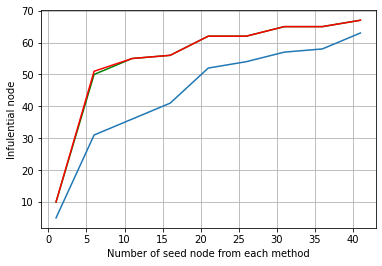


Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit
2
Enter the percentage you want to affect :70
skip: 1
For 6  affected nodes
percetange at 1st hop: 44.285714285714285 % reached
percetange at 2nd hop: 72.85714285714285 % reached
For 21  affected nodes
percetange at 1st hop: 74.28571428571429 % reached
percetange at 2nd hop: 88.57142857142857 % reached
If want to see the curve of 1st and 2nd hop press Y else N
y


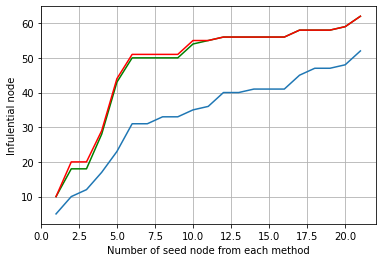


Press 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes

Press 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop

Press 3 -> Find top n seed nodes

Press 4 -> Exit


KeyboardInterrupt: ignored

In [ ]:
while(1):
    print("\nPress 1 -> Find percentage of nodes affected(in 1st and 2nd hop) for inputed number of affected nodes")
    print("\nPress 2 -> Find number of nodes need to be affected to reach a given Percentage in 1st and 2nd hop")
    print("\nPress 3 -> Find top n seed nodes")
    print("\nPress 4 -> Exit")
    ch = int(input())
    if(ch==2):
        val = int(input("Enter the percentage you want to affect :"))
        c=0
        x=[]
        y=[]
        x_plot=[]
        y_plot=[]
        y2=[]
        skip= int(input("skip: "))
        for s in range(1,totalnnode,skip):
            #total seed nodes from above methods
            unique_seed_node_list=top_seed_nodes(s)
            #to find unique seed nodes
            #unique_seed_node_list=list(set(node))
            #print(unique_seed_node_list)
            second_influencial_node_list=infulential_node_function(unique_seed_node_list)
            #print(second_influencial_node_list)
            #third_influencial_node_list=infulential_node_function(second_influencial_node_list)
            third_influencial_node_list=infulential_node_function(second_influencial_node_list)
            third_total=list(set(second_influencial_node_list+third_influencial_node_list))
            str = "percetange at 1st hop:"
            str2 = "percetange at 2nd hop:"
            hop1 = ((len(second_influencial_node_list)/len(air))*100)
            hop2 = ((len(third_influencial_node_list)/len(air))*100)
            hop3 = ((len(third_total)/len(air))*100)
            x.append(s)
            y.append(len(second_influencial_node_list))
            y_plot.append(len(third_influencial_node_list))
            y2.append(len(third_total))
            if(hop3>=val and c==0):
                c=1
                print("For",s," affected nodes")
                print(str,hop1,"% reached")
                print(str2,hop3,"% reached")
            if(hop1>=val):
                print("For",s," affected nodes")
                print(str,hop1,"% reached")
                print(str2,hop3,"% reached")
                print("If want to see the curve of 1st and 2nd hop press Y else N")
                ch2 = input()
                if(ch2=='Y' or ch2=='y'):
                    plt.plot(x,y)
                    plt.plot(x,y_plot,color='green')
                    plt.plot(x,y2,color='red')
                    plt.xlabel('Number of seed node from each method')
                    plt.ylabel('Infulential node')
                    plt.grid()
                    plt.show()
                    break
                else:
                    break
                
    if(ch==1):
        val = int(input("Enter the number nodes affected nodes :"))
        s = val
        unique_seed_node_list=top_seed_nodes(s)
        #unique_seed_node_list=list(set(seed_node))
        #unique_seed_node_list=unique_seed_node_list[:s]
        second_influencial_node_list=infulential_node_function(unique_seed_node_list)
        third_influencial_node_list=infulential_node_function(second_influencial_node_list)
        hop1 = ((len(second_influencial_node_list)/len(air))*100)
        hop2 = ((len(third_influencial_node_list)/len(air))*100)
        print(len(second_influencial_node_list)," nodes affected in 1st hop and i.e. ",hop1,"%")
        print(len(third_influencial_node_list)," nodes affected in 2nd hop and i.e. ",hop2,"%")

    if(ch==3):
      s = int(input("Enter the value of 'n' for the loaded centrality "))
      seed_node=top_seed_nodes(s)
      #unique_seed_node_list=list(set(seed_node))
      print("The top",s,"seed nodes are",seed_node)

    if(ch==4):
        sys.exit(0)